In [1]:
import numpy as np
import netCDF4 as nc
import os
from matplotlib import pyplot as plt
from matplotlib import ticker
import cartopy as crt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean
import datetime as dt
from shapely import geometry
import sys
from salishsea_tools.places import PLACES
import matplotlib as mpl
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=12)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=12)
mpl.rc('font', size=12)
#mpl.rc('text', usetex=True)
#mpl.rc('text.latex', preamble = ','.join(r'''
# \usepackage{txfonts}
# \usepackage{lmodern}
# '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    bathy=np.sum(mesh.variables['tmask'][0,:,:,:]*mesh.variables['e3t_0'][0,:,:,:],0)
    tmask=mesh.variables['tmask'][:,:,:,:]

In [3]:
s3lon,s3lat=PLACES['S3']['lon lat']
qu39lon,qu39lat=PLACES['QU39']['lon lat']

In [4]:
bc=.85
cm2=mpl.colors.ListedColormap(((bc,bc,bc),(1,1,1)))

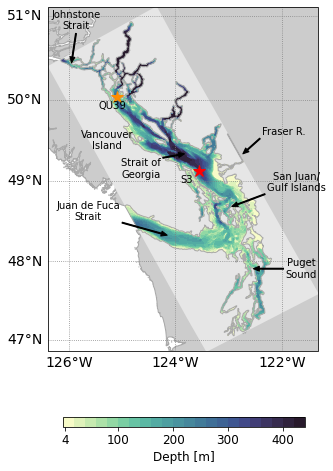

In [14]:
fig = plt.figure(figsize=(8,7))
#gs = fig.add_gridspec(1, 2)
cax = fig.add_axes([0.079, 0.075, 0.42, 0.02])
xlim,ylim=[-126.43,-121.25],[46.8,51.14]
ax0 = fig.add_axes([0.052, 0.104, 0.47, 0.925],projection=crt.crs.Mercator(np.mean(xlim), *ylim))
#ax1 = fig.add_axes([0.532, 0.01, 0.46, 0.98])
#ax0.set_extent(xlim + ylim)

ax0.add_feature(crt.feature.GSHHSFeature('full', edgecolor='darkgray', facecolor=(.8,.8,.8)))
verts=[[navlon[0,0]+.01,navlat[0,0]+.01*(navlat[0,0]-navlat[-1,0])/(navlon[0,0]-navlon[-1,0])],
       [navlon[0,-1]+.01,navlat[0,-1]+.01*(navlat[0,-1]-navlat[-1,-1])/(navlon[0,-1]-navlon[-1,-1])],
       [navlon[-1,-1]-.01,navlat[-1,-1]-.01*(navlat[0,-1]-navlat[-1,-1])/(navlon[0,-1]-navlon[-1,-1])],
       [navlon[-1,0]-.01,navlat[-1,0]]-.01*(navlat[0,0]-navlat[-1,0])/(navlon[0,0]-navlon[-1,0])]
poly = geometry.polygon.Polygon(verts)
p=ax0.add_geometries([poly,],crs=crt.crs.PlateCarree(),facecolor=(.9,.9,.9), edgecolor=None,lw=1, zorder=1)
#gl = ax0.gridlines(crs=crt.crs.PlateCarree(), draw_labels=True,
#              linewidth=1, color='gray', alpha=1, linestyle=':')
c = ax0.contourf(navlon, navlat, np.ma.masked_where(tmask[0,0,:,:]==0,bathy),25,vmin=4,vmax=430,
    cmap=cmocean.cm.deep, transform=crt.crs.PlateCarree(), zorder=2) # zorder controls when object is drawn
mm=ax0.contour(navlon, navlat, tmask[0,0,:,:],levels=[-0.01, 0.01], linewidths=1,colors='darkgray', 
        transform=crt.crs.PlateCarree(), zorder=2)
cbar=fig.colorbar(c, cax=cax, label='Depth [m]',ticks=[4,100,200,300,400],orientation='horizontal')
#cax.set_ylim((4/430,1))
ax0.annotate('Fraser R.',xy=(1.23e5,6.3e6),xytext=(1.63e5,6.34e6),
        arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=10)
ax0.annotate('Strait of\nGeorgia',xy=(0.01e5,6.30e6),xytext=(-.9e5,6.25e6),
        arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=10,ha='center')

#ax0.annotate('Sechelt\nInlet',xy=(-0.04e5,6.37e6),xytext=(0.7e5,6.38e6),
#        arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
#ax0.annotate('Toba\nInlet',xy=(-0.58e5,6.495e6),xytext=(0.05e5,6.485e6),
#        arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
#ax0.annotate('Bute\nInlet',xy=(-1.12e5,6.56e6),xytext=(-0.5e5,6.54e6),
#        arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
#ax0.annotate('Jervis\nInlet',xy=(0.03e5,6.44e6),xytext=(0.7e5,6.46e6),
#        arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
ax0.plot(s3lon,s3lat,'*',color='red',markersize=13,transform=crt.crs.PlateCarree())
ax0.text(s3lon-.35,s3lat-.15,'S3',transform=crt.crs.PlateCarree())

ax0.plot(qu39lon,qu39lat,'*',color='darkorange',markersize=13,transform=crt.crs.PlateCarree())
ax0.text(qu39lon-.35,qu39lat-.15,'QU39',transform=crt.crs.PlateCarree())

ax0.annotate('Johnstone\nStrait',xy=(-2.35e5,6.49e6),xytext=(-2.25e5,6.56e6),
        arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=10,ha='center')

#ax0.annotate('Sequim\nBay',xy=(0.85e5,6.08e6),xytext=(0.2e5,6.04e6),
#        arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')

ax0.annotate('Juan de Fuca\nStrait',xy=(-0.35e5,6.13e6),xytext=(-2.0e5,6.18e6),
        arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=10,ha='center',va='center')

ax0.annotate('Puget\nSound',xy=(1.45e5,6.06e6),xytext=(2.45e5,6.06e6),
        arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=10,ha='center',va='center')

ax0.annotate('San Juan/\nGulf Islands',xy=(1.0e5,6.19e6),xytext=(2.35e5,6.24e6),
        arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=10,ha='center',va='center')

ax0.annotate('Vancouver\nIsland', xy=(-1.6e5,6.31e6), fontsize=10,ha='center')
# jervis inlet, sechelt inlet, toba inlet, okeover inlet, queen charlotte strait, saanich inlet, 
#haro strait, rosario strait, active pass, admiralty inlet
temp=ax0.get_xlim()
temp2=ax0.get_ylim()
#print(temp,temp2)
xlocs=ticker.FixedLocator(np.arange(np.floor(xlim[0]-1), np.ceil(xlim[1])+2,2))
ylocs = ticker.FixedLocator(np.arange(np.floor(ylim[0]), np.ceil(ylim[1])+1))
gl = ax0.gridlines(linestyle=":", color='gray', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.top_labels, gl.right_labels = False, False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}
a=18

#fig.savefig('/ocean/aisabell/MEOPAR/report_figures/map.png',dpi=300)